In [1]:
pip install matplotlib

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')


In [4]:
data=pd.read_csv('zomato.csv')

In [5]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
data.shape

(51717, 17)

In [7]:
data.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')>

In [8]:
data.rename(columns={'approx_cost(for two people)':'approx_cost','listed_in(city)':'area'},inplace=True)

In [9]:
data.drop(['url', 'address','menu_item', 'reviews_list', 'dish_liked', 'phone', 'listed_in(type)'], axis = 1,inplace=True)

In [10]:
df=data

In [11]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Banashankari


In [12]:
data.rename(columns = {'approx_cost(for two people)' : 'approx_cost', 'listed_in(city)' : 'area'}, inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   online_order  51717 non-null  object
 2   book_table    51717 non-null  object
 3   rate          43942 non-null  object
 4   votes         51717 non-null  int64 
 5   location      51696 non-null  object
 6   rest_type     51490 non-null  object
 7   cuisines      51672 non-null  object
 8   approx_cost   51371 non-null  object
 9   area          51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [14]:
#unique values
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
df['rate'] =  df['rate'].str.replace("/5", "")
df['rate'] =  df['rate'].str.replace("nan", "NaN")
df['rate'] =  df['rate'].str.replace("NEW", "NaN")
df['rate'] =  df['rate'].str.replace("-", "NaN")
df['rate'] =  df['rate'].str.replace(" /5", "")
df['rate'] =  df['rate'].fillna(np.nan)
df['rate'] =  df['rate'].str.replace(" ", "")

In [16]:
df["rate"].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NaN', '2.9', '3.5', nan,
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [17]:
df["approx_cost"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [18]:
df['approx_cost']=df['approx_cost'].str.replace('nan','NaN')
df['approx_cost']=df['approx_cost'].fillna(np.nan)
df['approx_cost']=df['approx_cost'].str.replace(',','')

In [19]:
df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', nan, '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [20]:
df['approx_cost'] = df['approx_cost'].astype(float)
df['rate'] = df['rate'].astype(float)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          41665 non-null  float64
 4   votes         51717 non-null  int64  
 5   location      51696 non-null  object 
 6   rest_type     51490 non-null  object 
 7   cuisines      51672 non-null  object 
 8   approx_cost   51371 non-null  float64
 9   area          51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB


In [22]:
#let's chek the data describtion # statistical(based on 5 no. summery)
df.describe()

,rate,votes,approx_cost
count,41665.000000,51717.000000,51371.000000
mean,3.700449,283.697527,555.431566
std,0.440513,803.838853,438.850728
min,1.800000,0.000000,40.000000
25%,3.400000,7.000000,300.000000
50%,3.700000,41.000000,400.000000
75%,4.000000,198.000000,650.000000
max,4.900000,16832.000000,6000.000000


In [23]:
#cheking for null values
df.isnull().sum()

name                0
online_order        0
book_table          0
rate            10052
votes               0
location           21
rest_type         227
cuisines           45
approx_cost       346
area                0
dtype: int64

In [24]:
#check for the percentage of null values
(df.isnull().sum()/df.shape[0])*100

name             0.000000
online_order     0.000000
book_table       0.000000
rate            19.436549
votes            0.000000
location         0.040606
rest_type        0.438927
cuisines         0.087012
approx_cost      0.669026
area             0.000000
dtype: float64

In [25]:
df=df[df['location'].notna()]
df=df[df['rest_type'].notna()]
df=df[df['cuisines'].notna()]
df=df[df['approx_cost'].notna()]

In [26]:
df.isna().sum()

name               0
online_order       0
book_table         0
rate            9885
votes              0
location           0
rest_type          0
cuisines           0
approx_cost        0
area               0
dtype: int64

In [27]:
#let's handle the null values in the 'rate'coulmns
df['rate'].describe()

count    41263.000000
mean         3.702011
std          0.439985
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

In [28]:
#lets check for the outliers by statistical method
q1 = df['rate'].quantile(0.25)
q3 = df['rate'].quantile(0.75)

xyz = q3 - q1

lower_range =q1-(1.5*xyz)
upper_range = q3 + (1.5 * xyz)

outliers= len(df[(df['rate']<lower_range)|(df['rate'] > upper_range)])
print("Number of Rows having Outliers : ", outliers)

Number of Rows having Outliers :  183


In [29]:
df['rate']=df['rate'].fillna(df['rate'].median())
df.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
approx_cost     0
area            0
dtype: int64

In [30]:
#lets check the numerical columns
Numerical_features=[feature for feature in df.columns if df[feature].dtypes !='O']
print('There are {} numerical_features and their names are{}'.format(len(Numerical_features),Numerical_features))

There are 3 numerical_features and their names are['rate', 'votes', 'approx_cost']


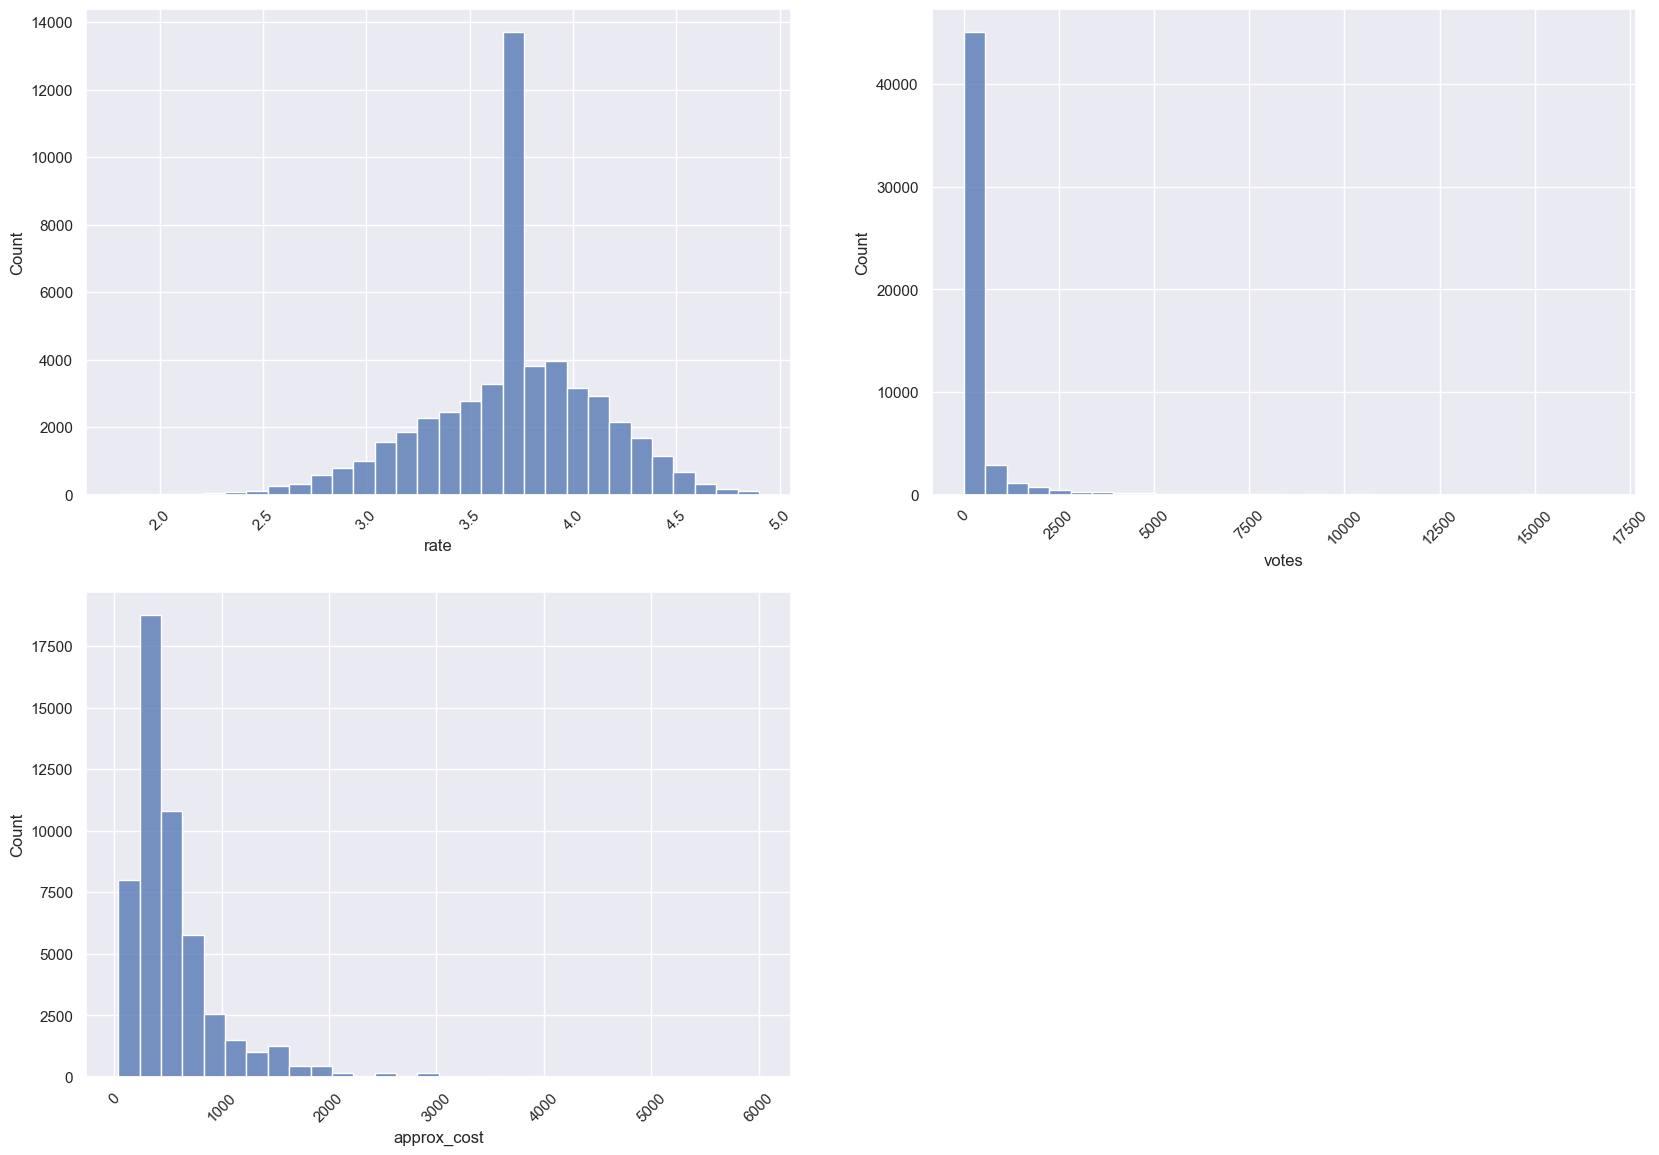

In [31]:
#let's check for the distrubution of the numerical features
plt.figure(figsize=(20,150))
for i in enumerate(Numerical_features):
    plt.subplot(20,2,i[0]+1)
    sns.set(rc={'figure.figsize':(5,5)})
    sns.histplot(data=df,x=i[1],bins=30)
    plt.xticks(rotation=45)


In [32]:
#Reset the index
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)
#axis=1(columns and 0 = rows)it define the direction

# Data visualization

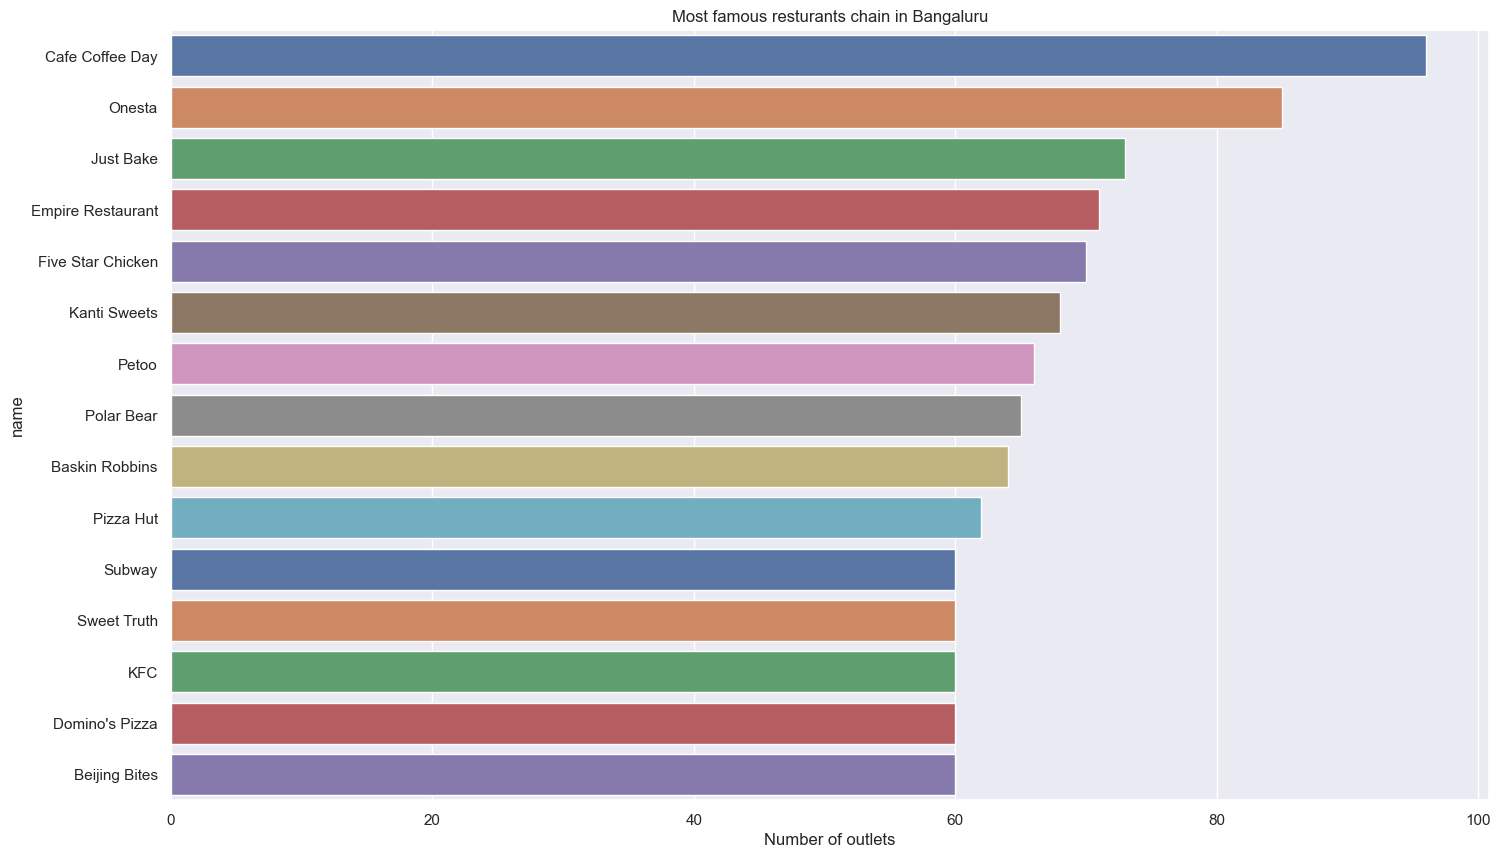

In [33]:
#index means rows
#lets check the most famous resturant chain in Bangaluru
plt.figure(figsize=(17,10))
chains=df['name'].value_counts()[:15]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title('Most famous resturants chain in Bangaluru')
plt.xlabel('Number of outlets')
plt.show()
            
            



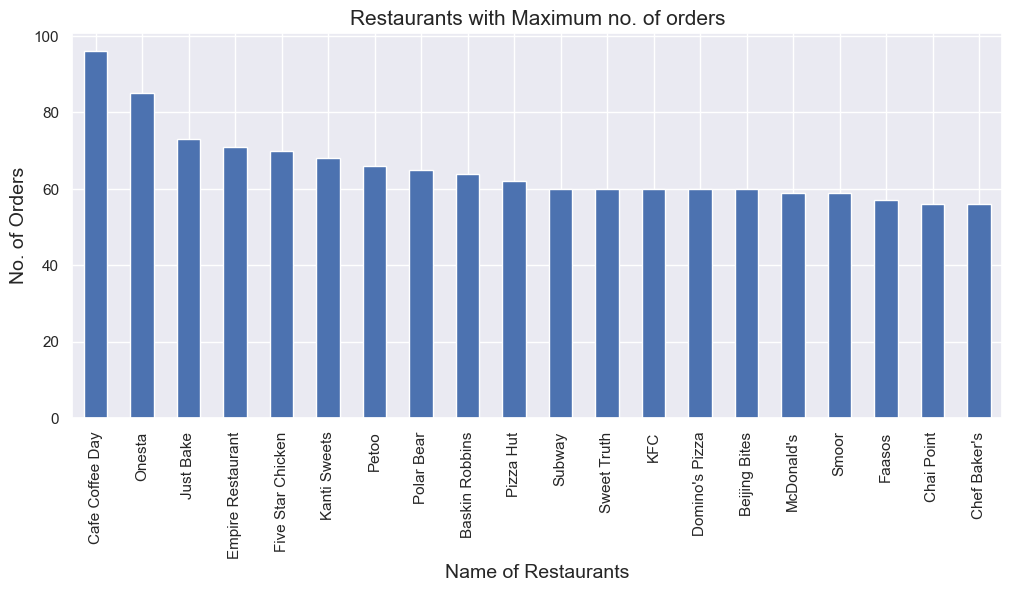

In [34]:
#lets check for the
plt.figure(figsize = (12,5))
data = df['name'].value_counts()[:20]
data.plot(kind ='bar')
plt.xlabel('Name of Restaurants',size =14)
plt.ylabel('No. of Orders', size=14)
plt.title('Restaurants with Maximum no. of orders',fontsize=15)
plt.show()

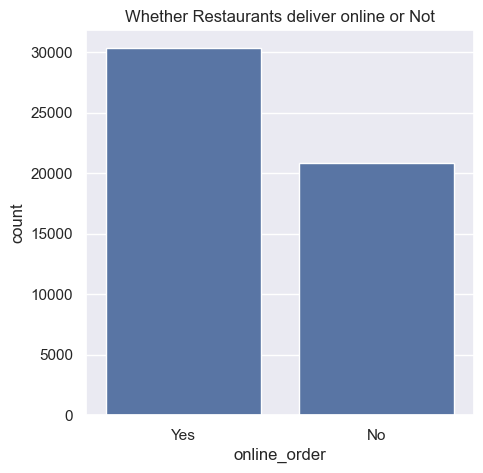

In [35]:
sns.countplot(data=df,x=df['online_order'])
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.title("Whether Restaurants deliver online or Not")
plt.show()

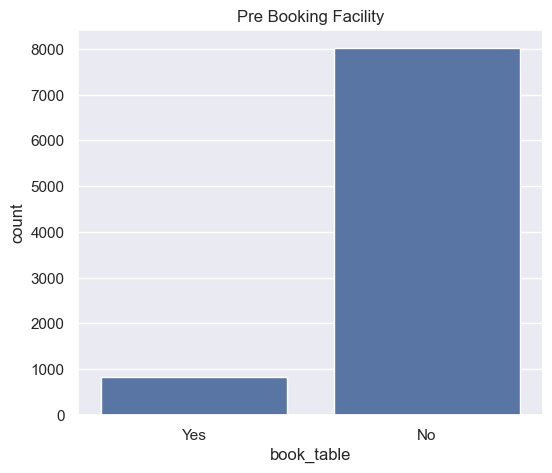

In [36]:
# let's check how many resturants offer pre booking table bookings
data = df[['name','book_table']].drop_duplicates()
plt.figure(figsize=(6,5))
fx= sns.countplot(x='book_table',data=data).set_title('Pre Booking Facility',fontsize =12)
plt.show()

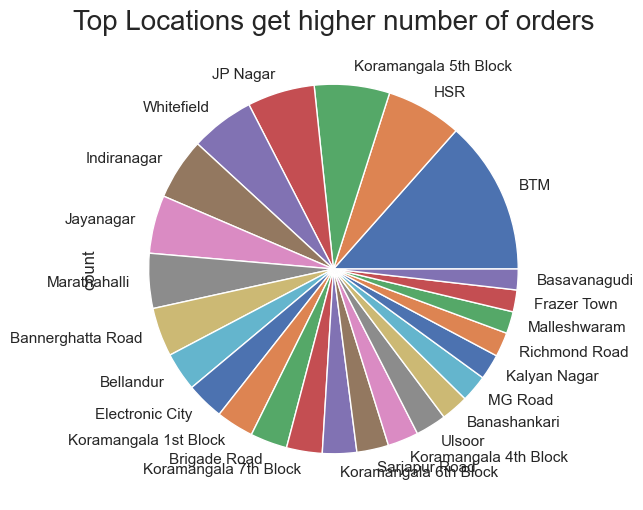

In [37]:
#let's check the locations that have highest orders
plt.figure (figsize = (12,6))
data = df.location.value_counts()[0:25]
data.plot(kind='pie')
plt.title('Top Locations get higher number of orders',size= 20)
plt.show()

<Axes: xlabel='rate', ylabel='Density'>

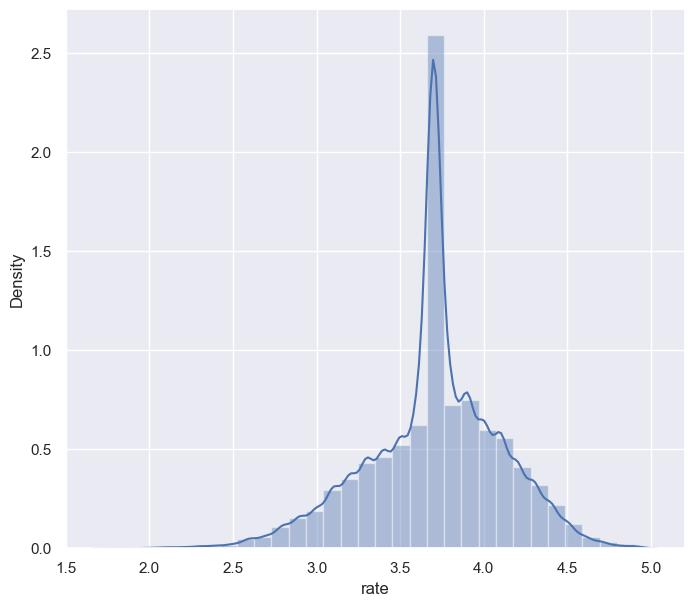

In [38]:
#let's check for the most common rating for the orders
plt.figure(figsize=(8,7))
sns.distplot(df['rate'],bins=30)

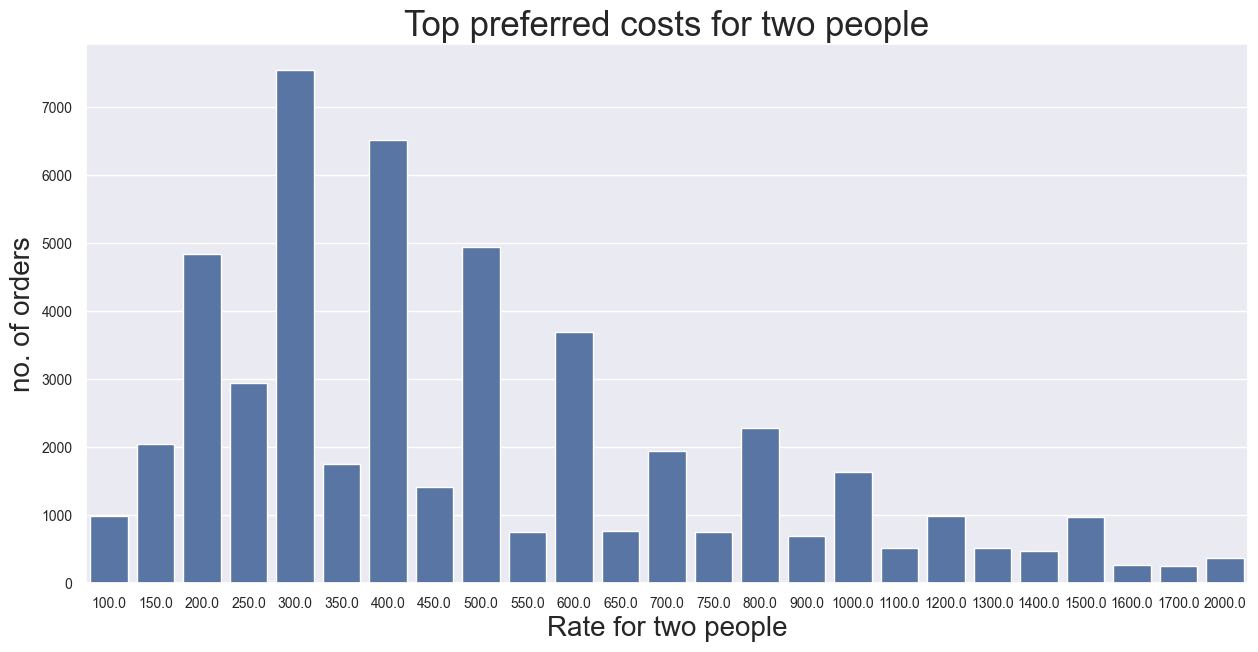

In [39]:
#let
data=pd.DataFrame(df["approx_cost"].value_counts().reset_index()[:25])
data.columns = ['approx_cost','count']
data = data.set_index('approx_cost')
plt.figure(figsize=(15,7))
sns.barplot(x= data.index, y=data['count'])
plt.xlabel('Rate for two people', size=20)
plt.ylabel('no. of orders', size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Top preferred costs for two people', size =25)
plt.show()

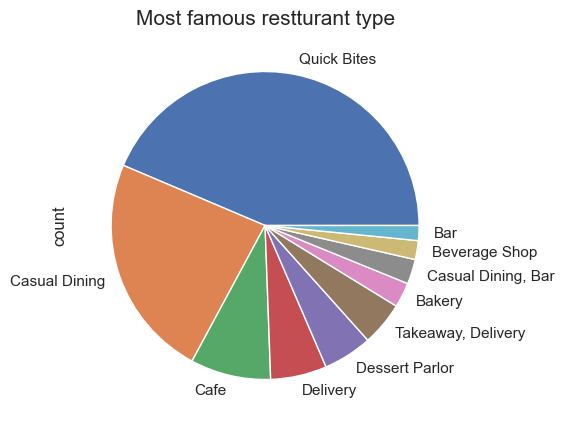

In [40]:
#let's check the top types of the orders
plt.figure(figsize=(12,5))
abc = df.rest_type.value_counts()[:10]
abc.plot(kind='pie')
plt.title('Most famous restturant type',fontsize=15)
plt.show()

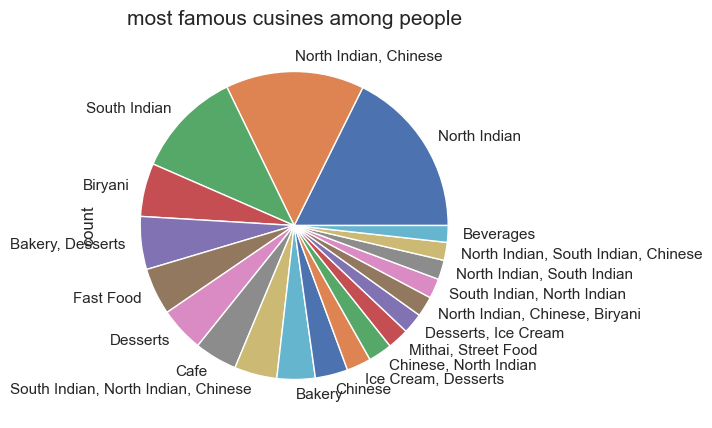

In [41]:
#let's check for most famous cusines among people
plt.figure(figsize=(12,5))
xyz = df.cuisines.value_counts()[:20].plot(kind='pie')
plt.title('most famous cusines among people',fontsize=15)
plt.show()

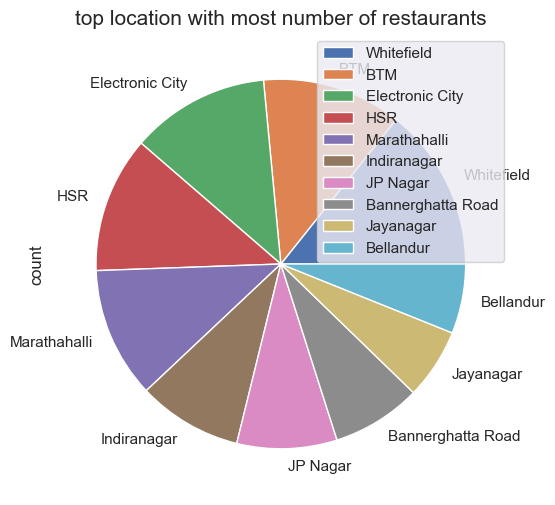

In [42]:
#let's
loc = pd.DataFrame(df.groupby(by= 'location')['name'].nunique())
loc.columns = ['count']
loc.sort_values(by='count', ascending= False, inplace=True)
plt.rcParams['figure.figsize'] = (8,6)
ax = loc[0:10].plot(kind='pie',subplots= True)
plt.title ("top location with most number of restaurants", size =15)
plt.show()

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'rate'), Text(0, 1.5, 'votes'), Text(0, 2.5, 'approx_cost')])

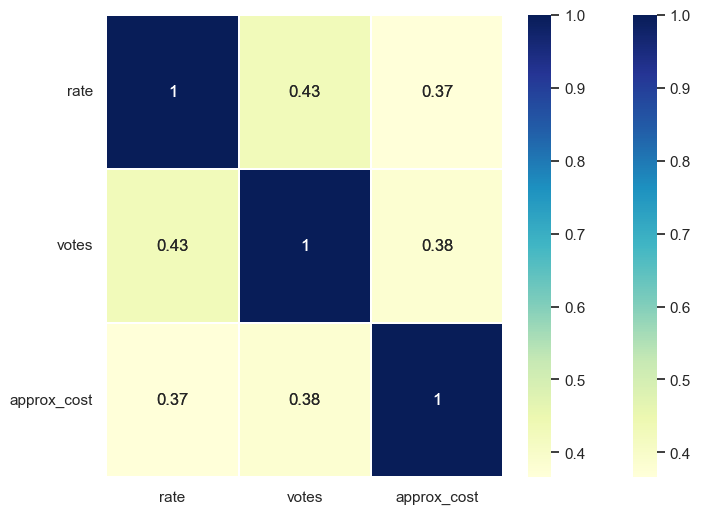

In [43]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), linewidths=.1, cmap='YlGnBu', annot=True)
plt.yticks(rotation=0)
sns.heatmap(df.select_dtypes(include=['number']).corr(), linewidths=.1, cmap='YlGnBu', annot=True)
plt.yticks(rotation=0)

# let's build our model


In [44]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


In [45]:
#let's convert the categorical variables


In [46]:
df.online_order[df.online_order == 'Yes'] = 1
df.online_order[df.online_order == 'No'] = 0

In [47]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,1,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,1,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,1,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,0,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,0,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


In [48]:
#for the column 'book_table'
df.book_table[df.book_table== 'Yes'] = 1
df.book_table[df.book_table== 'No']= 0
df.head()


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


In [49]:
rest_df = pd.DataFrame(df['rest_type'])
rts = list(rest_df.rest_type.str.split(", "))
unique_rts = list(set([rt for sub_list in rts for rt in sub_list]))

for rt in unique_rts:
    rest_df[rt] = int(0)
    
rest_df.head()

,rest_type,Casual Dining,Fine Dining,Cafe,Club,Dhaba,Pub,Dessert Parlor,Confectionery,Takeaway,...,Kiosk,Food Court,Meat Shop,Bhojanalya,Sweet Shop,Beverage Shop,Lounge,Pop Up,Microbrewery,Irani Cafee
0,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Casual Dining",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Quick Bites,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
count = 0
for i in rts:
    rest_df.loc[count, i] = int(1)       
    count+=1

In [51]:
rest_df.head()

,rest_type,Casual Dining,Fine Dining,Cafe,Club,Dhaba,Pub,Dessert Parlor,Confectionery,Takeaway,...,Kiosk,Food Court,Meat Shop,Bhojanalya,Sweet Shop,Beverage Shop,Lounge,Pop Up,Microbrewery,Irani Cafee
0,Casual Dining,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Casual Dining,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Casual Dining",1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Quick Bites,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Casual Dining,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
rest_df.drop(['rest_type'], axis = 1, inplace= True)
rest_df.head()

,Casual Dining,Fine Dining,Cafe,Club,Dhaba,Pub,Dessert Parlor,Confectionery,Takeaway,Delivery,...,Kiosk,Food Court,Meat Shop,Bhojanalya,Sweet Shop,Beverage Shop,Lounge,Pop Up,Microbrewery,Irani Cafee
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
cuisines_df = pd.DataFrame(df['cuisines'])
cuisines = list(cuisines_df.cuisines.str.split(", "))
unique_cuisines = list(set([cs for sub_list in cuisines for cs in sub_list]))
unique_cuisines.remove("Cafe") 
unique_cuisines.remove("Bakery")

for cn in unique_cuisines:
    cuisines_df[cn] = 0   
    
cuisines_df.head()

,cuisines,Indonesian,Korean,Lucknowi,Assamese,Salad,Bengali,Australian,Iranian,Rolls,...,Bubble Tea,Singaporean,Mongolian,Modern Indian,Grill,North Eastern,Mediterranean,Wraps,Ice Cream,Bar Food
0,"North Indian, Mughlai, Chinese",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Chinese, North Indian, Thai",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Mexican, Italian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"South Indian, North Indian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"North Indian, Rajasthani",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# for cuisines column

In [54]:
correct_cn = []
for i in cuisines:
    if "Cafe" in i:
        i.remove("Cafe") 
    if "Bakery" in i:
        i.remove("Bakery")
    correct_cn.append(list(set(i)))
    count = 0
for i in correct_cn:
    cuisines_df.loc[count, i] = int(1)
    count+=1
    
    
cuisines_df.head()

,cuisines,Indonesian,Korean,Lucknowi,Assamese,Salad,Bengali,Australian,Iranian,Rolls,...,Bubble Tea,Singaporean,Mongolian,Modern Indian,Grill,North Eastern,Mediterranean,Wraps,Ice Cream,Bar Food
0,"North Indian, Mughlai, Chinese",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Chinese, North Indian, Thai",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Mexican, Italian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"South Indian, North Indian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"North Indian, Rajasthani",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
cuisines_df.drop(['cuisines'], axis = 1, inplace=True)
cuisines_df.head()

,Indonesian,Korean,Lucknowi,Assamese,Salad,Bengali,Australian,Iranian,Rolls,Jewish,...,Bubble Tea,Singaporean,Mongolian,Modern Indian,Grill,North Eastern,Mediterranean,Wraps,Ice Cream,Bar Food
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
location_df = df['location']
location_df = pd.get_dummies(location_df)
location_df.head()

,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,Basaveshwara Nagar,Bellandur,Bommanahalli,Brigade Road,Brookefield,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
data_with_location = pd.concat([df, rest_df, cuisines_df, location_df], axis=1)
data_with_location.head()


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False


In [58]:
area_df = df['area']
area_df = pd.get_dummies(area_df)
area_df.head()

,BTM,Banashankari,Bannerghatta Road,Basavanagudi,Bellandur,Brigade Road,Brookefield,Church Street,Electronic City,Frazer Town,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
data_with_area = pd.concat([df, rest_df, cuisines_df, area_df], axis = 1)
data_with_area.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
